In [519]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.optimize import curve_fit

dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")

planet_name_LI        = list(star_name+" "+planet_letter)
dataLI["planet_name"] = planet_name_LI
# dataLI_top = dataLI.head()

In [515]:
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet
planet_name_LI       = star_name+" "+planet_letter

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]   # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]   # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]   # [g/cm**3] Planet Density Lower Unc

In [513]:
header = ['planet_name', "R_Rterra","euR_Rterra", "edR_Rterra","M_Mterra","euM_Mterra","edM_Mterra"]
dataLI.to_csv('output.csv', columns = header)

In [514]:
i = 0
for column_headers in dataLI.columns: 
    print(i,column_headers)
    i +=1

0 ID
1 Star
2 AltName
3 Karmn
4 RA_J2000
5 DE_J2000
6 SpT
7 SpTnum
8 d_pc
9 ed_pc
10 Lbol_Lsol
11 eLbol_Lsol
12 Teff_K
13 eTeff_K
14 R_Rsol
15 eR_Rsol
16 M_Msol
17 eM_Msol
18 J_mag
19 eJ_mag
20 Ks_mag
21 eKs_mag
22 Planet
23 TOI
24 Porb_d
25 a_au
26 R_Rterra
27 euR_Rterra
28 edR_Rterra
29 M_Mterra
30 euM_Mterra
31 edM_Mterra
32 rho_gcm-3
33 eurho_gcm-3
34 edrho_gcm-3
35 Teq_K
36 euTeq_K
37 edTeq_K
38 TSM
39 ESM
40 Method
41 DiscoveryRef
42 ParameterRef
43 planet_name


In [516]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet
planet_name_LI       = star_name+" "+planet_letter

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]   # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]   # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]   # [g/cm**3] Planet Density Lower Unc

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 

In [491]:
list(planet_name_EA).index("K2-18 b")

1399

In [517]:
# Luque filter
log_planets_id    = [47, 48, 184, 189, 190, 214, 231, 232, 236, 240, 244, 258, 261, 941, 942, 1351, 1352, 1400, 1504, 1568, 1569, 2128, 2129, 2449, 2450, 2451, 3455, 3456, 4600, 4675, 4677, 4678, 4679, 4681, 4682, 4683, 4686, 4688, 4690, 4691, 4695, 4696, 4697, 4698, 4922, 4933, 4937, 4938, 4950, 4951, 4972, 4973, 4974, 4975, 4976, 4984, 4990, 4995, 4999, 5003, 5036, 5064, 5083, 5084, 5085, 5086, 5190, 5191, 5210, 5211, 5212, 5213, 5214, 5215, 5216]
in_luque_imp      = ["y", "n", "y", "y", "y", "n", "y", "y", "y", "n", "n", "y", "y", "n", "n", "y", "y", "y", "y", "y", "y", "n", "n", "y", "y", "y", "n", "n", "n", "y", "n", "y", "y", "y", "y", "y", "y", "y", "n", "n", "n", "n", "y", "y", "n", "n", "y", "y", "y", "y", "n", "n", "n", "n", "n", "y", "y", "n", "y", "n", "n", "n", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y", "y"]
log_id            = [x - 1 for x in log_planets_id]
luque_imp_names   = []
luque_log_index   = []
for i in range(0,len(log_planets_id)):
    if in_luque_imp[i] == "y":
        luque_imp_names.append(planet_name_EA[log_planets_id[i]-1])
        luque_log_index.append(log_planets_id[i]-1)

Header: ID,Star,AltName,Karmn,RA_J2000,DE_J2000,SpT,SpTnum,d_pc,ed_pc,Lbol_Lsol,eLbol_Lsol,Teff_K,eTeff_K,R_Rsol,eR_Rsol,M_Msol,eM_Msol,J_mag,eJ_mag,Ks_mag,eKs_mag,Planet,TOI,Porb_d,a_au,R_Rterra,euR_Rterra,edR_Rterra,M_Mterra,euM_Mterra,edM_Mterra,rho_gcm-3,eurho_gcm-3,edrho_gcm-3,Teq_K,euTeq_K,edTeq_K,TSM,ESM,Method,DiscoveryRef,ParameterRef

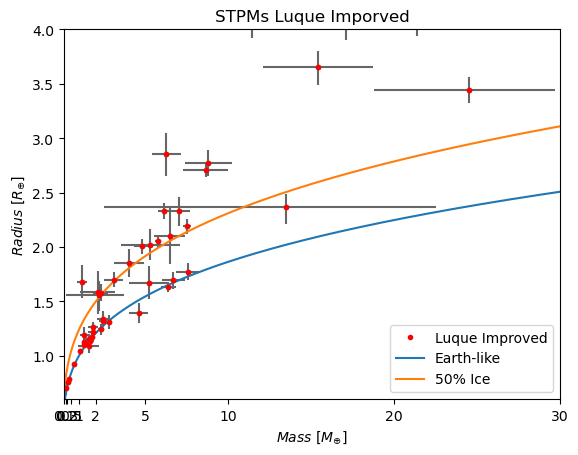

Text(0.5, 1.0, 'Luque planets data from Exoplanet Archive')

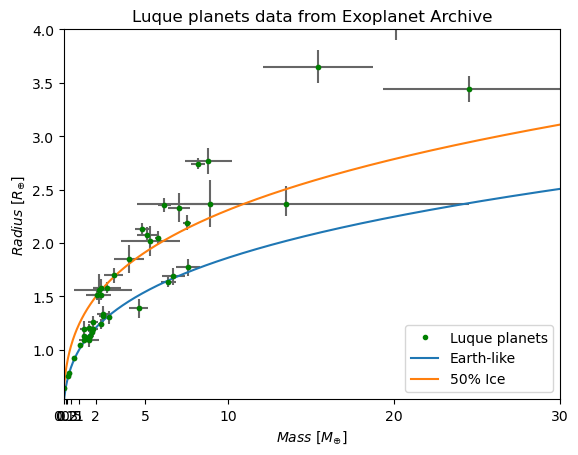

In [518]:
mass_err_LI       = [mass_unc_up_LI,mass_unc_low_LI]
radius_err_LI     = [radius_unc_up_LI,radius_unc_low_LI]
plt.figure(1)
plt.plot(mass_LI,radius_LI,'r.',label = "Luque Improved")
plt.errorbar(mass_LI, radius_LI,xerr = mass_err_LI, yerr=radius_err_LI,fmt='.', color='0.4',zorder=-32)

# Radius - Mass curve
# From Zeng et. al (2019) https://www.pnas.org/doi/epdf/10.1073/pnas.1812905116
mass_range         = np.linspace(0,30,1000)
rocky_cores_radius = np.power(mass_range , 1/3.7)
plt.plot(mass_range,rocky_cores_radius,"-",label = "Earth-like",zorder=-32)

ice_part = 0.5
function = 1+ 0.55*ice_part-0.14*np.power(ice_part,2)
ice50_radius = np.power(mass_range , 1/3.7) * function
plt.plot(mass_range,ice50_radius,"-",label = "50% Ice",zorder=-32)


plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
#plt.xscale("log")
plt.xlim(0.1,30)
plt.ylim(min(radius_LI)-0.1,4)
plt.xticks([0.1,0.2,0.3,0.5,1,2,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","5","10","20", "30"],minor=False)
plt.legend()
plt.title("STPMs Luque Imporved")
plt.show()

plt.figure(2)

mass_up_lim_EA     = dataEA.pl_bmasseerr1[luque_log_index]
mass_low_lim_EA    = abs(dataEA.pl_bmasseerr2[luque_log_index])
mass_err_EA        = [mass_low_lim_EA ,mass_up_lim_EA]
radius_up_lim_EA   = dataEA.pl_radeerr1[luque_log_index]
radius_low_lim_EA  = abs(dataEA.pl_radeerr2[luque_log_index])
radius_err_EA      = [radius_low_lim_EA ,radius_up_lim_EA ]
plt.plot(mass_EA[luque_log_index],radius_EA[luque_log_index],'g.',label = "Luque planets")
plt.errorbar(mass_EA[luque_log_index], radius_EA[luque_log_index],xerr = mass_err_EA, yerr=radius_err_EA,fmt='.', color='0.4',zorder=-32)

# Radius - Mass curve
# From Zeng et. al (2019) https://www.pnas.org/doi/epdf/10.1073/pnas.1812905116
mass_range         = np.linspace(0,30,1000)
rocky_cores_radius = np.power(mass_range , 1/3.7)
plt.plot(mass_range,rocky_cores_radius,"-",label = "Earth-like",zorder=-32)

ice_part = 0.5
function = 1+ 0.55*ice_part-0.14*np.power(ice_part,2)
ice50_radius = np.power(mass_range , 1/3.7) * function
plt.plot(mass_range,ice50_radius,"-",label = "50% Ice",zorder=-32)


plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Radius\ [R_{\oplus}]$")
#plt.xscale("log")
plt.xlim(0.1,30)
plt.ylim(min(radius_EA[luque_log_index])-0.1,4)
plt.xticks([0.1,0.2,0.3,0.5,1,2,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","5","10","20", "30"],minor=False)
plt.legend()
plt.title("Luque planets data from Exoplanet Archive")

(0.1, 30.0)

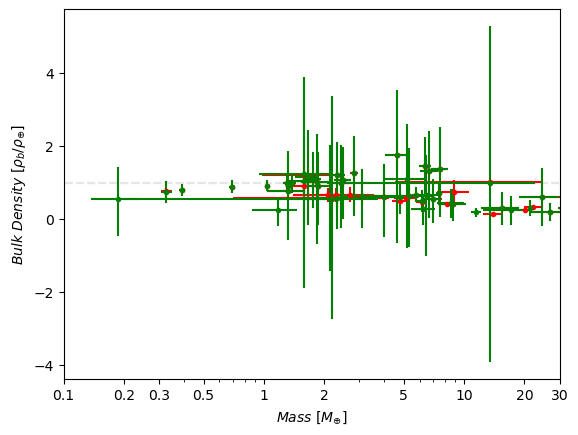

In [469]:
earth_density      = 5.51   # [g/cm**3]

plt.hlines(1,0,30,color = "0.9",linestyles="dashed",zorder=-40)

mass_up_lim_EA        = dataEA.pl_bmasseerr1[luque_log_index]
mass_low_lim_EA       = abs(dataEA.pl_bmasseerr2[luque_log_index])
mass_err_EA           = [mass_low_lim_EA,mass_up_lim_EA]

density_up_lim_EA     = dataEA.pl_denserr1[luque_log_index]/earth_density
density_low_lim_EA    = abs(dataEA.pl_denserr1[luque_log_index])/earth_density
density_err_EA        = [density_low_lim_EA,density_up_lim_EA]

plt.hlines(1,0,30,color = "0.9",linestyles="dashed",zorder=-40)
plt.errorbar(mass_EA[luque_log_index], density_EA[luque_log_index]/earth_density,xerr = mass_err_EA, yerr=density_err_EA,fmt='.', color='r',zorder=-32)

mass_err_LI           = [mass_unc_up_LI,mass_unc_low_LI]
density_err_LI        = [density_unc_up_LI,density_unc_low_LI]

plt.hlines(1,0,30,color = "0.9",linestyles="dashed",zorder=-40)
plt.errorbar(mass_LI, density_LI/earth_density,xerr = mass_err_LI, yerr=density_err_LI,fmt='.', color='g',zorder=-32)


plt.xlabel("$Mass\ [M_{\oplus}]$")
plt.ylabel("$Bulk\ Density\ [ρ_{b}/ρ_{\oplus}]$")
plt.xscale("log")
plt.xticks([0.1,0.2,0.3,0.5,1,2,5,10,20, 30],["0.1","0.2","0.3","0.5","1","2","5","10","20", "30"],minor=False)
plt.xlim(0.1,30)

In [470]:
p_name_LI    = planet_name_LI
p_name_LI[0] = "LHS 1140 b"
p_name_LI[1] = "LHS 1140 c"
p_name_LI[40]= "L 168-9 b"

In [478]:
index_LI_in_EA = []
difference_radius = []
difference_mass = []
names = []
obs_list = []
for i in range(0,len(planet_name_LI)):
    index_LI_in_EA.append(list(planet_name_EA).index(list(planet_name_LI)[i]))
    difference_radius.append(radius_EA[index_LI_in_EA[i]]-radius_LI[i])
    difference_mass.append(mass_EA[index_LI_in_EA[i]]-mass_LI[i])
    names.append([planet_name_EA[index_LI_in_EA[i]]+planet_name_LI[i]])
    relative_mass  = (mass_unc_up_EA[index_LI_in_EA[i]] - mass_unc_low_EA[index_LI_in_EA[i]])/(2*mass_EA[index_LI_in_EA[i]])
    relative_radius= (radius_unc_up_EA[index_LI_in_EA[i]] - radius_unc_low_EA[index_LI_in_EA[i]])/(2*radius_EA[index_LI_in_EA[i]])

    #if relative_mass > 0.25:
    #    print("relative mass",planet_name_EA[index_LI_in_EA[i]],relative_mass,mass_EA[index_LI_in_EA[i]])
    #if radius_EA[index_LI_in_EA[i]] > 4:
    #    print(planet_name_EA[index_LI_in_EA[i]],radius_EA[index_LI_in_EA[i]])
    if relative_radius > 0.08:
        print("relative radius",planet_name_EA[index_LI_in_EA[i]],relative_radius,radius_EA[index_LI_in_EA[i]])
    #if abs(difference_mass[-1]) > 0.1:
    #    print(planet_name_EA[index_LI_in_EA[i]], "has a mass of",mass_EA[index_LI_in_EA[i]],"in the Exoplanet Archive, but a mass of ",mass_LI[i], "in Luque's sample, which is a difference of", np.round(difference_mass[-1],2))
    #if abs(difference_radius[-1]) > 0.1:
    #    print(planet_name_EA[index_LI_in_EA[i]], "has a radius of",radius_EA[index_LI_in_EA[i]],"in the Exoplanet Archive, but a radius of",radius_LI[i], "in Luque's sample, which is a difference of", np.round(difference_radius[-1],2))
    

relative radius K2-18 b 0.09282700421940927 2.37
relative radius TOI-1266 c 0.08974358974358974 1.56


In [494]:
for i in range(0,len(planet_name_LI)):
    relative_mass  = (mass_unc_up_LI[i] + mass_unc_low_LI[i])/(2*mass_LI[i])
    relative_radius= (radius_unc_up_LI[i] + radius_unc_low_LI[i])/(2*radius_LI[i])

    if relative_mass > 0.25:
        print("relative mass",planet_name_LI[i],relative_mass,mass_LI[i])
    if radius_LI[i] > 4:
        print(planet_name_LI[i],radius_LI[i])
    if relative_radius > 0.08:
        print("relative radius",planet_name_LI[i],relative_radius,radius_LI[i])


LP 714-47 b 4.7
relative mass LHS 1815 b 0.3924050632911392 1.58
GJ 3470 b 4.032
TOI-1728 b 5.05
relative radius K2-3 b 0.12196861626248216 2.103
relative mass K2-3 c 0.4953271028037383 2.14
relative radius K2-3 c 0.12373737373737374 1.584
GJ 436 b 4.1
relative mass TOI-776 c 0.339622641509434 5.3
relative mass TOI-1266 b 0.7407407407407407 13.5
relative mass TOI-1266 c 0.7954545454545454 2.2
relative radius TOI-1266 c 0.08974358974358974 1.56
relative mass Kepler-138 b 0.26737967914438504 0.187
relative radius Kepler-138 b 0.09415121255349501 0.701
relative radius Kepler-138 c 0.08982035928143713 1.67
relative mass Kepler-138 d 0.25641025641025644 1.17
relative radius Kepler-138 d 0.08928571428571429 1.68
relative mass AU Mic b 0.2690058479532163 17.1
AU Mic b 4.07


Text(0.5, 1.0, 'Mass difference')

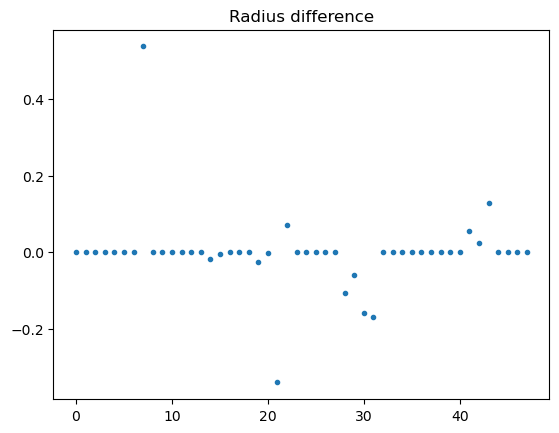

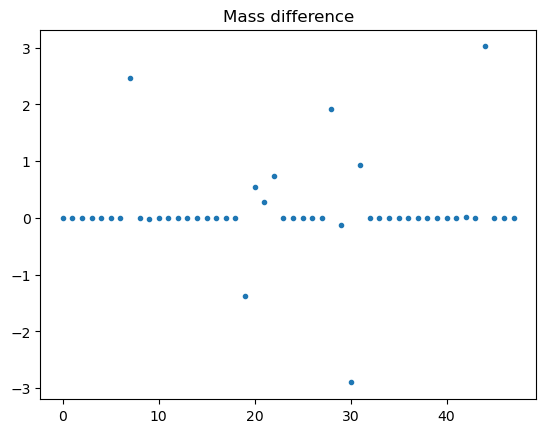

In [418]:
plt.figure(1)
plt.plot(range(0,len(list(radius_LI))),radius_EA[index_LI_in_EA]-list(radius_LI),".")
plt.title("Radius difference")
plt.figure(2)
plt.plot(range(0,len(list(mass_LI))),mass_EA[index_LI_in_EA]-list(mass_LI),".")
plt.title("Mass difference")


In [400]:
len(mass_EA[index_LI_in_EA]-list(mass_LI))

48

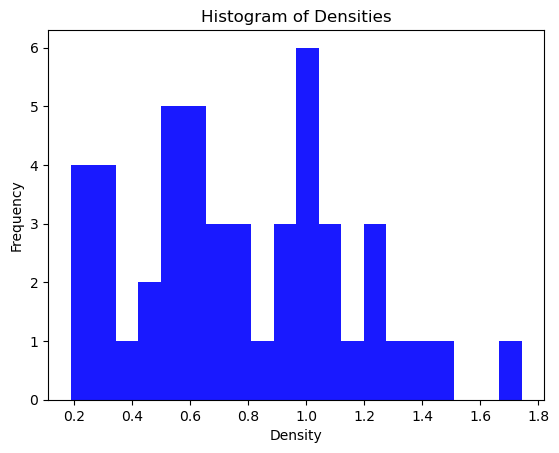

In [387]:
earth_density      = 5.51   # [g/cm**3]
densities  = np.array(density_LI/earth_density)
densities  = densities.reshape(-1, 1)
plt.hist(densities, bins=20, color='blue', alpha=0.9)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram of Densities')
plt.show()

In [419]:
print(radius_LI)

0     1.635
1     1.169
2     1.242
3     1.773
4     4.700
5     1.700
6     1.088
7     4.032
8     1.264
9     5.050
10    1.340
11    1.580
12    2.050
13    2.190
14    1.217
15    1.694
16    1.130
17    1.320
18    2.330
19    2.103
20    1.584
21    2.711
22    4.100
23    1.850
24    2.020
25    1.305
26    2.370
27    1.560
28    2.850
29    0.701
30    1.670
31    1.680
32    1.193
33    1.116
34    1.097
35    0.788
36    0.920
37    1.045
38    1.129
39    0.755
40    1.390
41    1.151
42    2.332
43    2.005
44    4.070
45    3.440
46    2.770
47    3.650
Name: R_Rterra, dtype: float64


Plotting and comparing samples